# Functions

In [2]:
import functions_paper_1
import importlib
from functions_paper_1 import *
exec(open("functions_paper_1.py").read())
# Local path to Sharepoint (on your computer, change if you are a different user)
#datadir = Path(Path('../datadir_yb.txt').read_text())
datadir = Path(Path('../datadir_srk.txt').read_text())
figure_folder = './figs_2024_promoter_editing_paper/20241108_Cre-timecourse/'

# Data

## data 1 

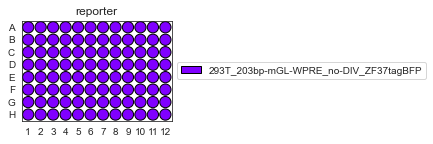

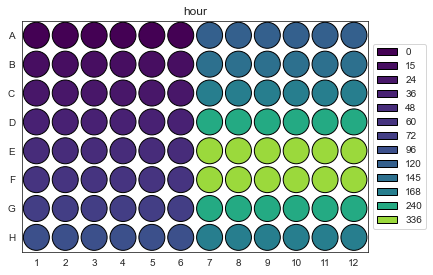

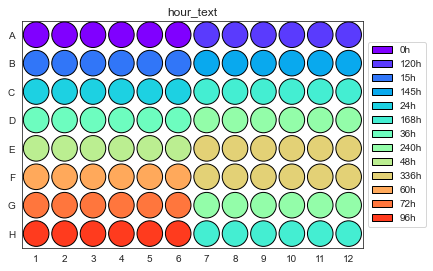

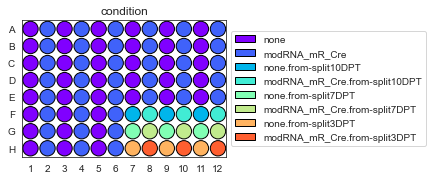

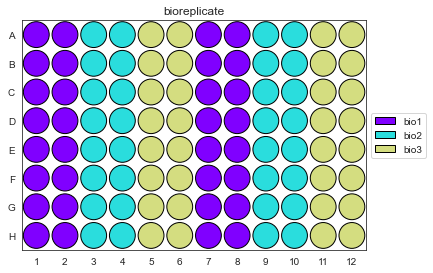

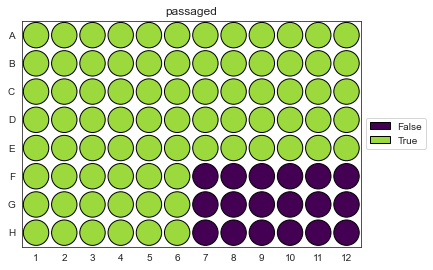

In [3]:
# Import Data- three reps 
folder = '20241108_Cre-time'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets_all' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data1 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data


## data 2

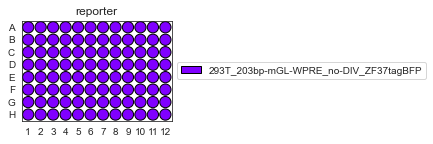

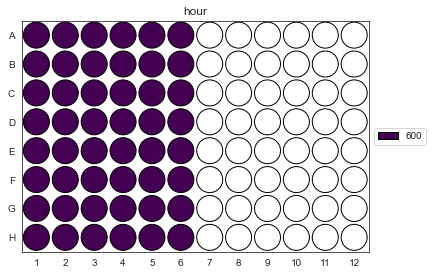

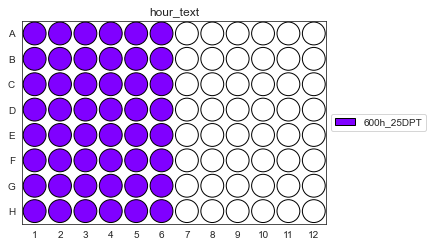

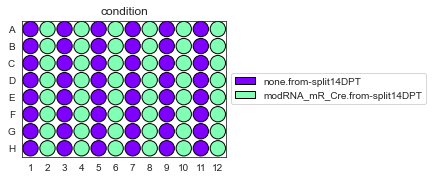

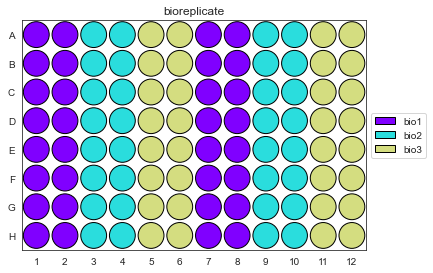

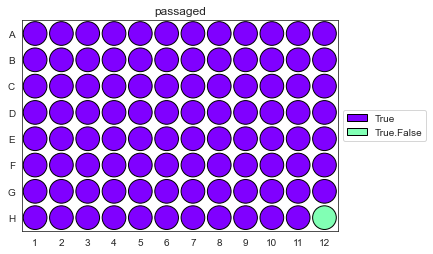

In [4]:
# Import Data- three reps, 25DPT data 
folder = '20241108_Cre-time'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'export_singlets_25DPT' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'well_metadata_25DPT.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data2 = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data


In [5]:
display(data2)

,reporter,hour,hour_text,condition,bioreplicate,passaged,well,population,FSC-A,FSC-H,...,TagBFP-A,TagBFP-H,TagBFP-W,Janelia Fluor 549-A,Janelia Fluor 549-H,Janelia Fluor 549-W,mCherry-A,mCherry-H,mCherry-W,Time
0,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,none.from-split14DPT,bio1,True,A1,Single Cells,337135,194070,...,227,149,15,442,311,42,-131,27,0,0.000
1,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,none.from-split14DPT,bio1,True,A1,Single Cells,258860,203753,...,-116,26,0,69,67,0,35,59,0,0.000
2,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,none.from-split14DPT,bio1,True,A1,Single Cells,238033,193969,...,50,86,0,106,194,30,-67,35,0,0.000
3,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,none.from-split14DPT,bio1,True,A1,Single Cells,345313,224685,...,99,111,15,56,78,0,22,54,0,0.000
4,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,none.from-split14DPT,bio1,True,A1,Single Cells,347470,221325,...,93,83,0,69,181,27,-13,91,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3452785,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,modRNA_mR_Cre.from-split14DPT,bio3,True,C6,Single Cells,525634,233188,...,-84,66,0,249,233,47,72,78,0,19.997
3452786,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,modRNA_mR_Cre.from-split14DPT,bio3,True,C6,Single Cells,335041,224522,...,138,84,0,138,172,21,-34,68,0,19.997
3452787,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,modRNA_mR_Cre.from-split14DPT,bio3,True,C6,Single Cells,367390,239117,...,14,60,0,45,81,0,77,80,0,19.998
3452788,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,600,600h_25DPT,modRNA_mR_Cre.from-split14DPT,bio3,True,C6,Single Cells,186670,151795,...,-7,73,0,117,93,0,-52,48,0,19.998


## concat data

In [6]:
data = pd.concat( [data1, data2], ignore_index=True)
#data = data[ data['weird']!= 'weird']
data = data[ data['mCherry-A'] >0]
data = data[ data['mGL-A'] >0]
data = data[ data['TagBFP-A'] >0]
data = data[ data['Janelia Fluor 549-A'] >0]
data = data[ data['iRFP670-A'] >0]

mChgate = 300
data_mChgated = data[ data['mCherry-A']>mChgate]

In [7]:
mGL_gate = 250

# Histograms

In [7]:
display( pd.unique(data['hour_text']))
display( pd.unique(data['condition']))

array(['120h', '0h', '145h', '15h', '168h', '24h', '240h', '36h', '336h',
       '48h', '60h', '72h', '96h', '600h_25DPT'], dtype=object)

array(['modRNA_mR_Cre', 'none', 'modRNA_mR_Cre.from-split10DPT',
       'none.from-split10DPT', 'modRNA_mR_Cre.from-split7DPT',
       'none.from-split7DPT', 'modRNA_mR_Cre.from-split3DPT',
       'none.from-split3DPT', 'none.from-split14DPT',
       'modRNA_mR_Cre.from-split14DPT'], dtype=object)

## Stacks histograms -/+ Cre, all combined / only no splitting

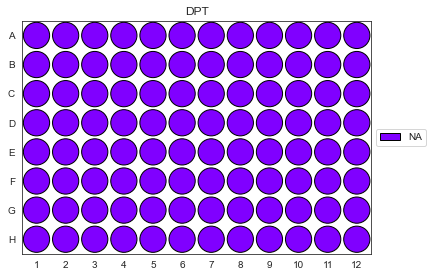

In [10]:
# Get dataneg 
folder = '20241108_Cre-time'
file_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'data_neg' #Assign file paths
yaml_path = datadir/'instruments'/'data'/'attune'/'Sneha'/folder/'data_neg.yaml' #Assign yaml paths 
rd.plot.plot_well_metadata(yaml_path)
data_neg = rd.flow.load_csv_with_metadata(file_path, yaml_path) #Pull data
data_neg = data_neg[ data_neg['mGL-A']>0] #reference, same laser settings 


0
0h
unstained should show
1
15h
unstained should show
2
24h
unstained should show
3
36h
unstained should show
4
48h
unstained should show
5
60h
unstained should show
6
72h
unstained should show
7
96h
unstained should show
8
120h
unstained should show
9
145h
unstained should show
10
168h
unstained should show
11
240h
unstained should show
12
336h
unstained should show
13
600h_25DPT
unstained should show


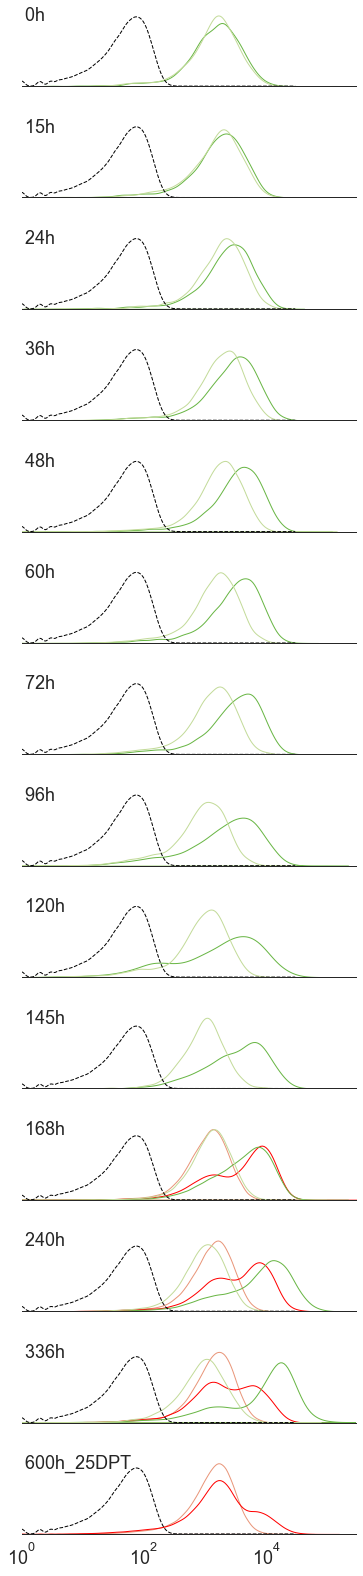

0
0h
unstained should show
1
15h
unstained should show
2
24h
unstained should show
3
36h
unstained should show
4
48h
unstained should show
5
120h
unstained should show
6
240h
unstained should show
7
336h
unstained should show


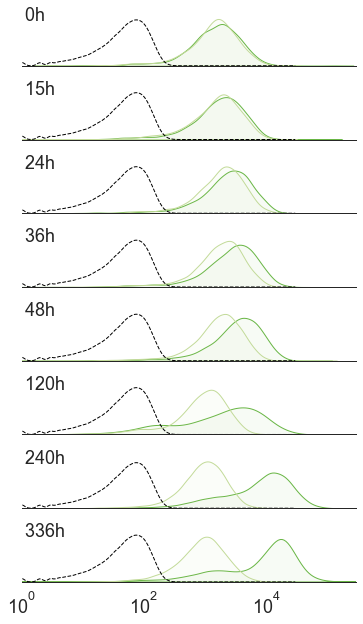

In [ ]:
# List of conditions for different stacked plots
Cre_cond = pd.array(['modRNA_mR_Cre', 'none'] )

# List of conditions for each row, dictionary
conditions = {}
for hour_text in pd.unique(data['hour_text']):
    #print(prom)
    conditions[hour_text] = 'hour_text'
desired_order = [ '0h',  '15h', '24h', '36h', '48h',
       '60h', '72h', '96h', 
       '120h','145h','168h',
       '240h', '336h','600h_25DPT']
conditions = {key: conditions[key] for key in desired_order if key in conditions}
hue = 'condition'
palette = {
     'none': '#C3DB9A',                                                
      'modRNA_mR_Cre': '#69B645', 

      'modRNA_mR_Cre.from-split10DPT': 'red',
       'none.from-split10DPT': 'darksalmon', 

       'modRNA_mR_Cre.from-split7DPT': 'red',
       'none.from-split7DPT': 'darksalmon', 

       'modRNA_mR_Cre.from-split3DPT': 'red',
       'none.from-split3DPT': 'darksalmon', 

       'modRNA_mR_Cre.from-split14DPT': 'red',
       'none.from-split14DPT': 'darksalmon'}



data_now = data
plottitle = ''
h = custom_hist_plot_stacked( data_now, 
                    parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0, fontsize=18, data_neg= data_neg, conditions=conditions,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'Output (mGL)', ysize = 2, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'histogram stacked all.'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

data_now = data[ data['condition'].isin(Cre_cond)]
desired_order_forfigure = [ '0h',  '15h', '24h', '36h', '48h',
                 #'60h', '72h', '96h', 
                 '120h',
                 #'145h','168h',
                 '240h', '336h']
conditions = {key: conditions[key] for key in desired_order_forfigure if key in conditions}
plottitle = ''
h = custom_hist_plot_stacked( data_now, 
                    parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0.05, fontsize=18, data_neg= data_neg, conditions=conditions,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'Output (mGL)', ysize = 1.3, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'histogram stacked nosplit'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## Stacked hist only splitting

0
3 dpt
unstained should show
1
7 dpt
unstained should show
2
10 dpt
unstained should show
3
14 dpt
unstained should show
4
25 dpt
unstained should show


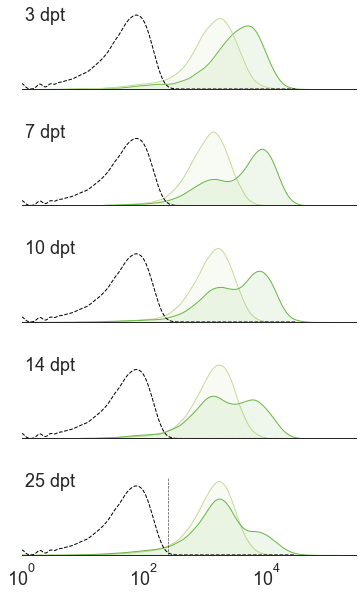

0
3 dpt
unstained should show
1
7 dpt
unstained should show
2
10 dpt
unstained should show
3
14 dpt
unstained should show
4
25 dpt
unstained should show


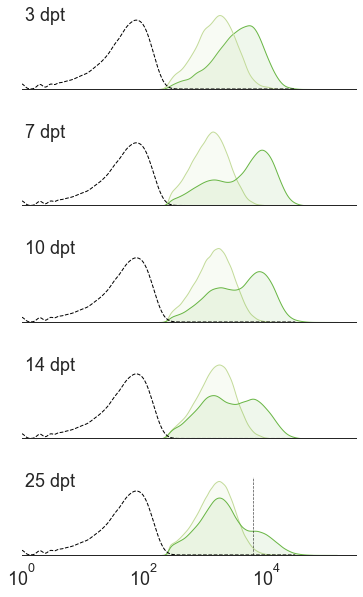

In [ ]:
map_DPT_short = {
       'none': '3 dpt',                                            
      'modRNA_mR_Cre': '3 dpt',    
      'modRNA_mR_Cre.from-split10DPT': '14 dpt', 
       'none.from-split10DPT': '14 dpt', 
       'modRNA_mR_Cre.from-split7DPT': '10 dpt', 
       'none.from-split7DPT': '10 dpt',  
       'modRNA_mR_Cre.from-split3DPT': '7 dpt', 
       'none.from-split3DPT': '7 dpt',  
       'modRNA_mR_Cre.from-split14DPT': '25 dpt', 
       'none.from-split14DPT': '25 dpt' }
data['DPT_short'] =data['condition'].map(map_DPT_short)


# List of conditions for each row, dictionary
conditions = {}
for DPT in pd.unique(data['DPT_short']):
    #print(prom)
    conditions[DPT] = 'DPT_short'
desired_order = [ '3 dpt', '7 dpt',
       '10 dpt', '14 dpt','25 dpt']
conditions = {key: conditions[key] for key in desired_order if key in conditions}
hue = 'condition'
palette = {
       'none': '#C3DB9A',                                                
      'modRNA_mR_Cre': '#69B645', 
      'modRNA_mR_Cre.from-split10DPT': '#69B645',
       'none.from-split10DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split7DPT': '#69B645',
       'none.from-split7DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split3DPT': '#69B645',
       'none.from-split3DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split14DPT': '#69B645',
       'none.from-split14DPT': '#C3DB9A'}
Cre_cond = { 'modRNA_mR_Cre.from-split10DPT': '#69B645',
       'none.from-split10DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split7DPT': '#69B645',
       'none.from-split7DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split3DPT': '#69B645',
       'none.from-split3DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split14DPT': '#69B645',
       'none.from-split14DPT': '#C3DB9A'}
Cre_cond_3DPT = {
       'none': '#C3DB9A',                                                
      'modRNA_mR_Cre': '#69B645', }


data_neg = data_neg

data_now = data[ data['condition'].isin(Cre_cond)]
data_now_3DPT = data[ (data['condition'].isin(Cre_cond_3DPT)) & (data['hour_text']=='72h')]
data_now = pd.concat([data_now, data_now_3DPT])
plottitle = ''
h = custom_hist_plot_stacked( data_now, 
                    parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0.1, fontsize=18, data_neg= data_neg, conditions=conditions,line = mGL_gate,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'Output (mGL)', ysize = 2, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'histogram stacked only splitting'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


data_now = data_now[ data_now['mGL-A'] > mGL_gate ]
plottitle = ''
h = custom_hist_plot_stacked( data_now, 
                    parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0.1, fontsize=18, data_neg= data_neg, conditions=conditions, line = 6000,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'Output (mGL)', ysize = 2, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'h splitGATEDmGL'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## Stacked histograms all

0
0h
unstained should show
1
72h
unstained should show
2
168h
unstained should show
3
240h
unstained should show
4
336h
unstained should show
5
600h_25DPT
unstained should show


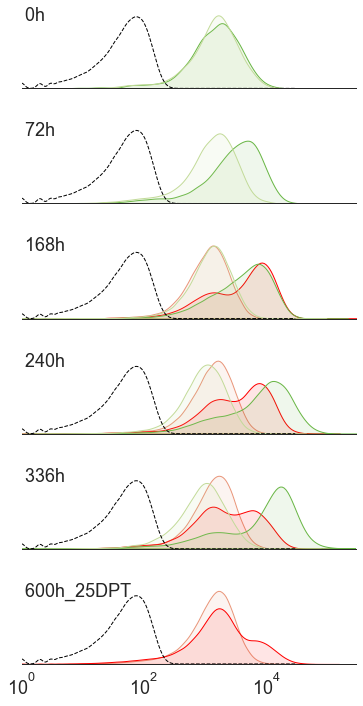

In [ ]:
# List of conditions for each row, dictionary
conditions = {}
for hour_text in pd.unique(data['hour_text']):
    #print(prom)
    conditions[hour_text] = 'hour_text'
desired_order = [ '0h', '72h', '168h',
       '240h', '336h','600h_25DPT']
conditions = {key: conditions[key] for key in desired_order if key in conditions}
hue = 'condition'
palette = {
         'none': '#C3DB9A',                                                
      'modRNA_mR_Cre': '#69B645', 
      'modRNA_mR_Cre.from-split10DPT': 'red',
       'none.from-split10DPT': 'darksalmon', 
       'modRNA_mR_Cre.from-split7DPT': 'red',
       'none.from-split7DPT': 'darksalmon', 
       'modRNA_mR_Cre.from-split3DPT': 'red',
       'none.from-split3DPT': 'darksalmon', 
       'modRNA_mR_Cre.from-split14DPT': 'red',
       'none.from-split14DPT': 'darksalmon'}
Cre_cond = palette 


data_neg = data_neg

data_now = data[ data['condition'].isin(Cre_cond)]
plottitle = ''
h = custom_hist_plot_stacked( data_now, 
                    parameters=pd.array(['mGL-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0.1, fontsize=18, data_neg= data_neg, conditions=conditions,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'Output (mGL)', ysize = 2, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'histogram stacked only splitting'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


## Histograms for the modRNA (mCherry)

0
0h
unstained should show
1
15h
unstained should show
2
24h
unstained should show
3
36h
unstained should show
4
48h
unstained should show
5
60h
unstained should show
6
72h
unstained should show
7
96h
unstained should show
8
120h
unstained should show
9
145h
unstained should show
10
168h
unstained should show
11
240h
unstained should show
12
336h
unstained should show
13
600h_25DPT
unstained should show


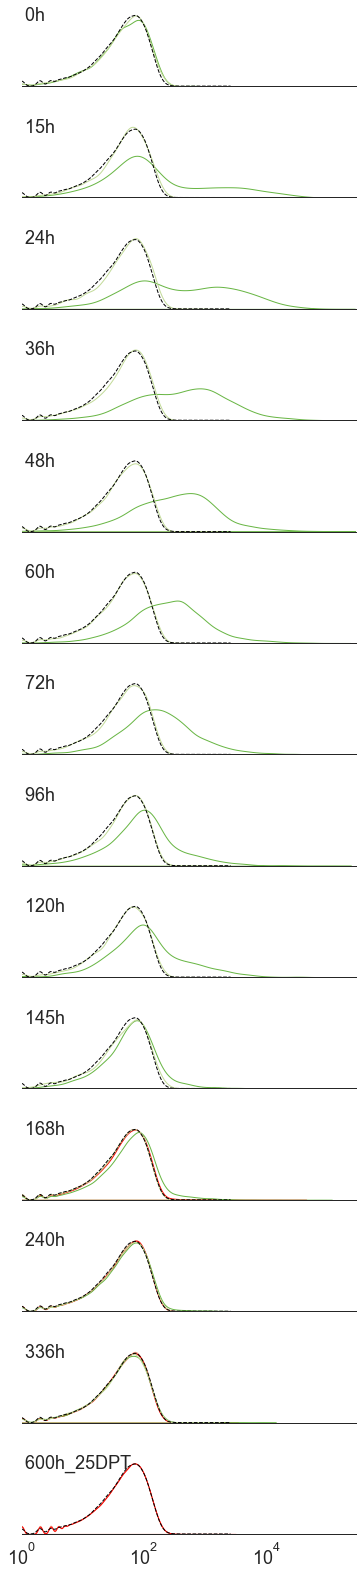

In [ ]:
# List of conditions for different stacked plots
Cre_cond = pd.array(['modRNA_mR_Cre', 'none'] )

# List of conditions for each row, dictionary
conditions = {}
for hour_text in pd.unique(data['hour_text']):
    #print(prom)
    conditions[hour_text] = 'hour_text'
desired_order = [ '0h',  '15h', '24h', '36h', '48h',
       '60h', '72h', '96h', 
       '120h','145h','168h',
       '240h', '336h','600h_25DPT']
conditions = {key: conditions[key] for key in desired_order if key in conditions}
hue = 'condition'
palette = {
     'none': '#C3DB9A',                                                
      'modRNA_mR_Cre': '#69B645', 

      'modRNA_mR_Cre.from-split10DPT': 'red',
       'none.from-split10DPT': 'darksalmon', 

       'modRNA_mR_Cre.from-split7DPT': 'red',
       'none.from-split7DPT': 'darksalmon', 

       'modRNA_mR_Cre.from-split3DPT': 'red',
       'none.from-split3DPT': 'darksalmon', 

       'modRNA_mR_Cre.from-split14DPT': 'red',
       'none.from-split14DPT': 'darksalmon'}


data_neg = data_neg


data_now = data
plottitle = ''
h = custom_hist_plot_stacked( data_now, 
                    parameters=pd.array(['mCherry-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0, fontsize=18, data_neg= data_neg, conditions=conditions,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'Output (mGL)', ysize = 2, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'histogram stacked all.mCherry'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


0
0h
unstained should show
1
15h
unstained should show
2
24h
unstained should show
3
36h
unstained should show
4
48h
unstained should show
5
120h
unstained should show
6
240h
unstained should show
7
336h
unstained should show


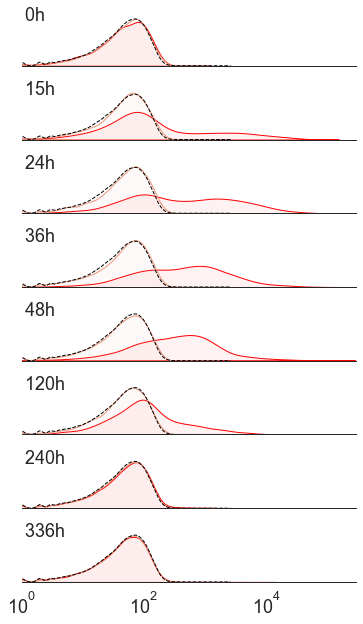

In [41]:
palette = { 
     'none': 'darksalmon',                                                
      'modRNA_mR_Cre': 'red', }

data_now = data[ data['condition'].isin(Cre_cond)]
desired_order = desired_order_forfigure
conditions = {key: conditions[key] for key in desired_order if key in conditions}
plottitle = ''
h = custom_hist_plot_stacked( data_now, 
                    parameters=pd.array(['mCherry-A']), hue=hue, palette=palette, hueorder=palette, title=plottitle, 
                    alpha=0.05, fontsize=18, data_neg= data_neg, conditions=conditions,
                    legendtitle='Condition',  xlim = [1e0, 3e5], xl = 'modRNA (mRuby2)', ysize = 1.3, xsize = 6,
                    axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
h = h.get_figure()
plottitle = 'histogram modRNA stacked nosplit'
h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')

## Histograms Individual + Joint Plots over time

947


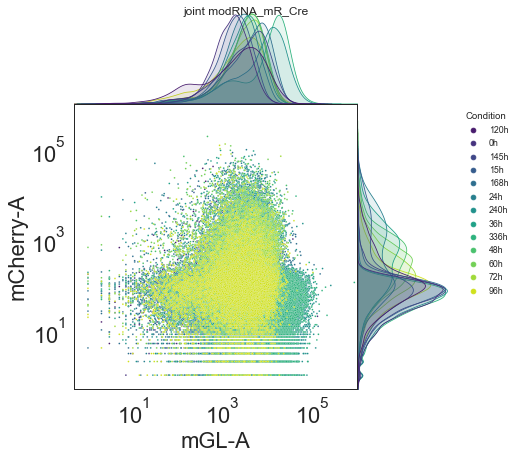

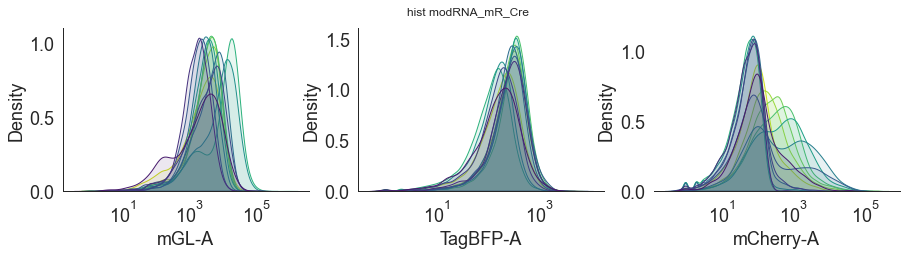

858


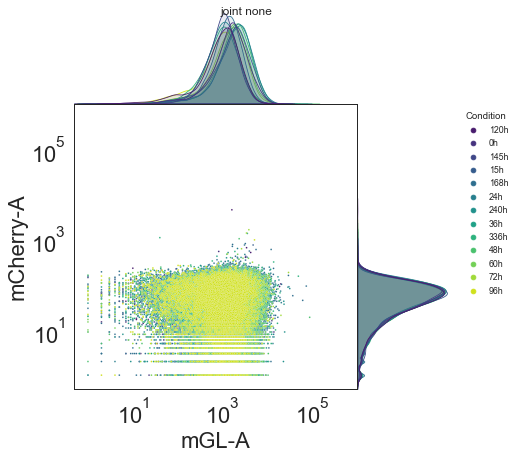

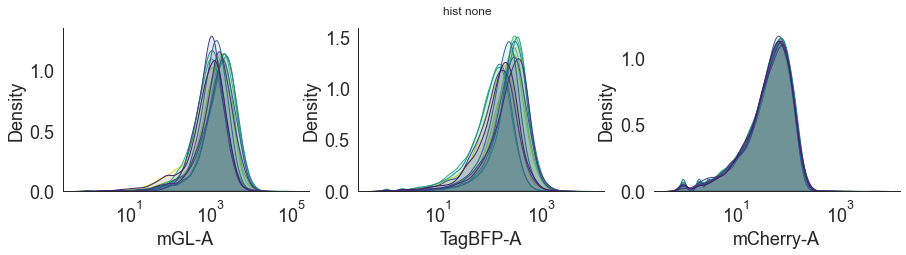

10000


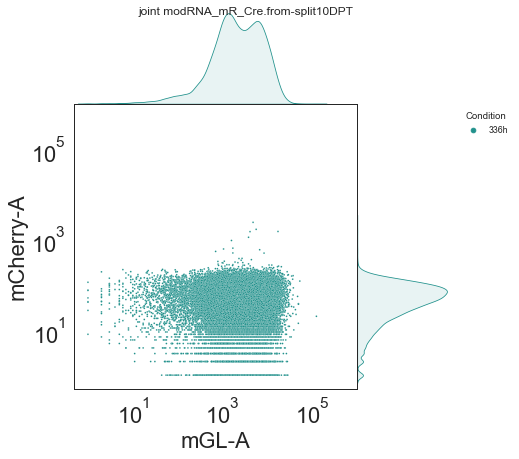

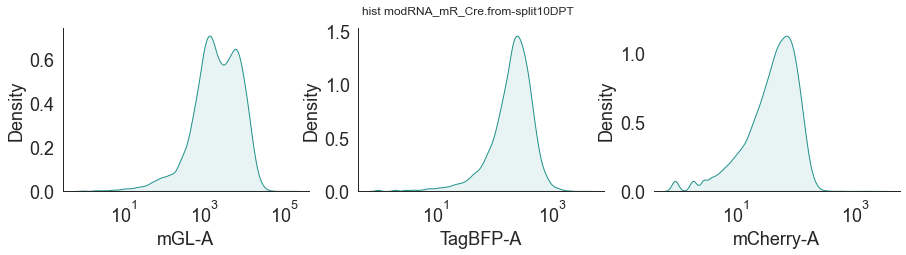

10000


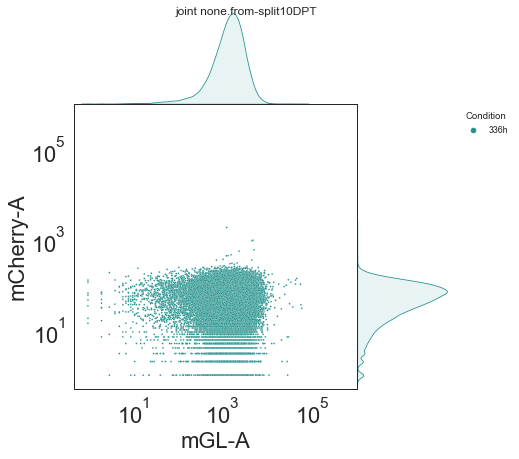

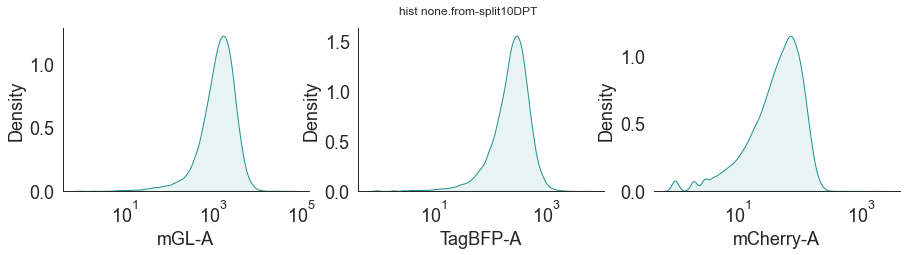

10000


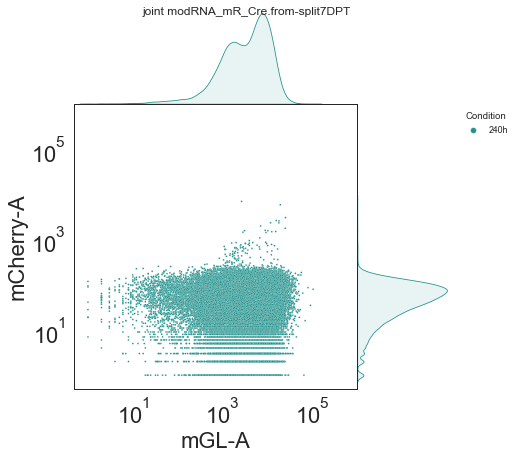

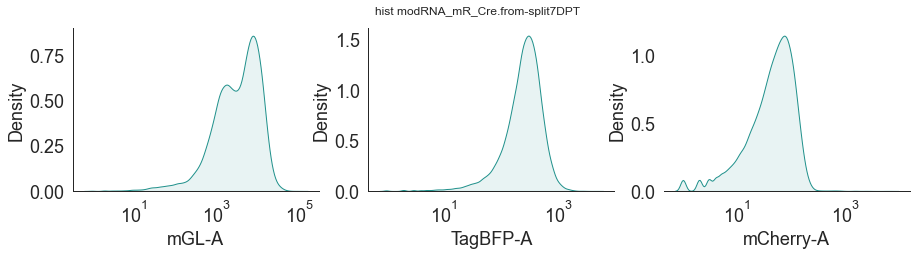

10000


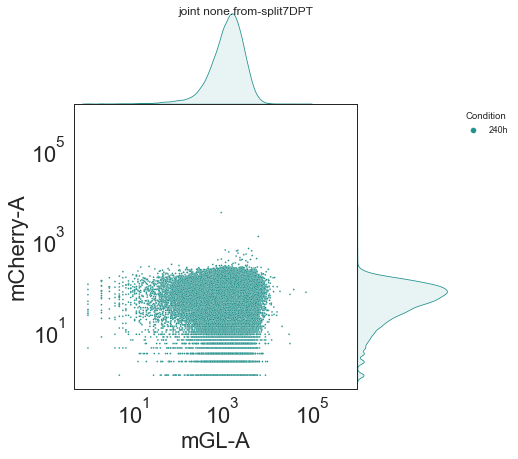

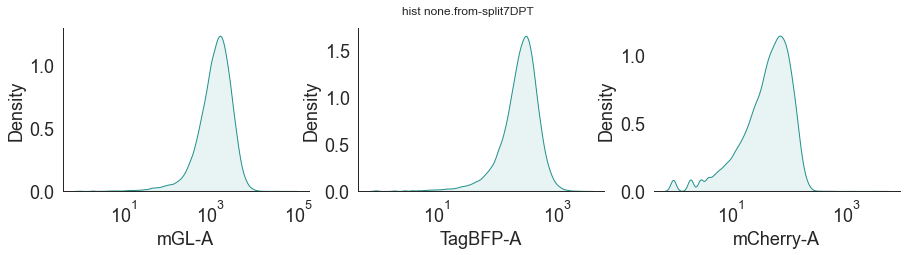

10000


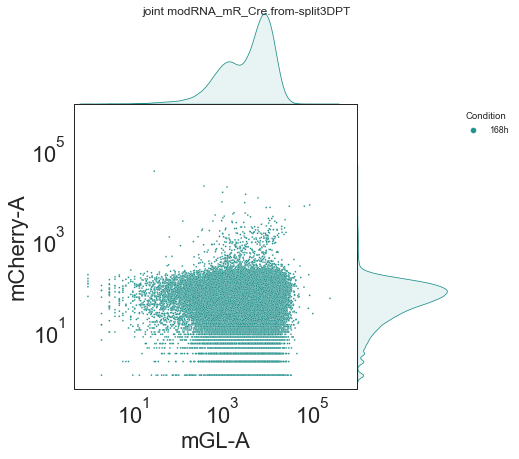

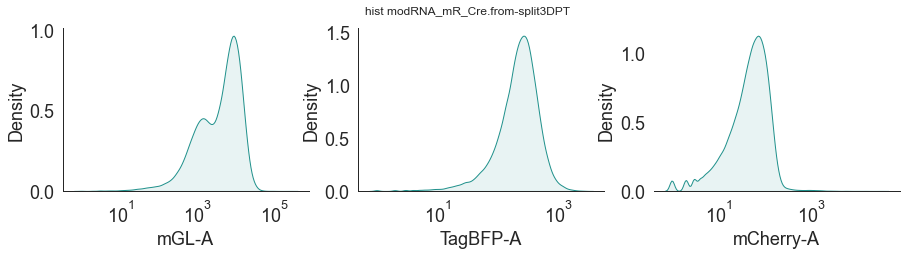

10000


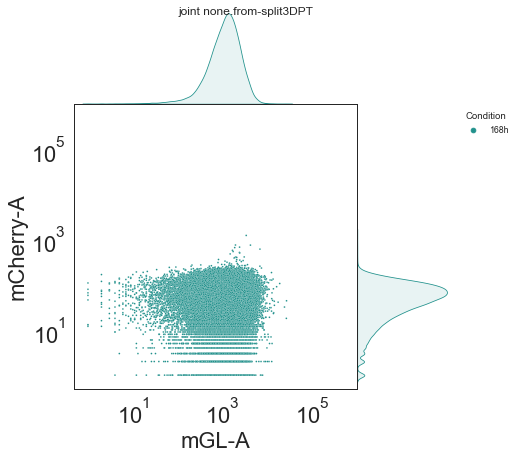

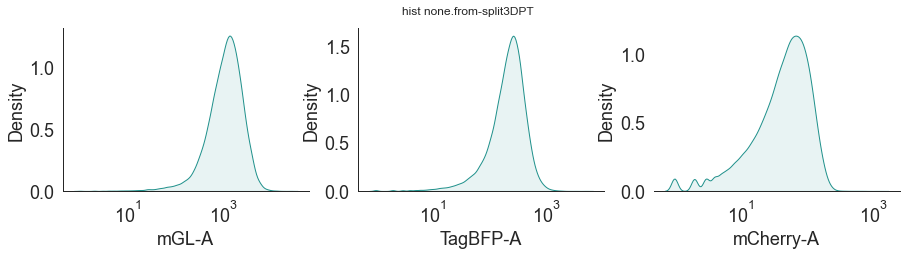

10000


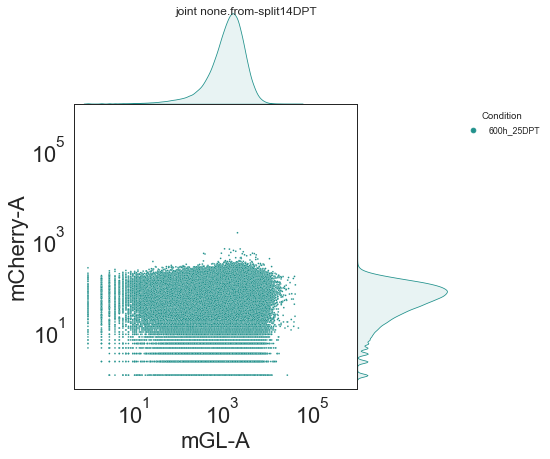

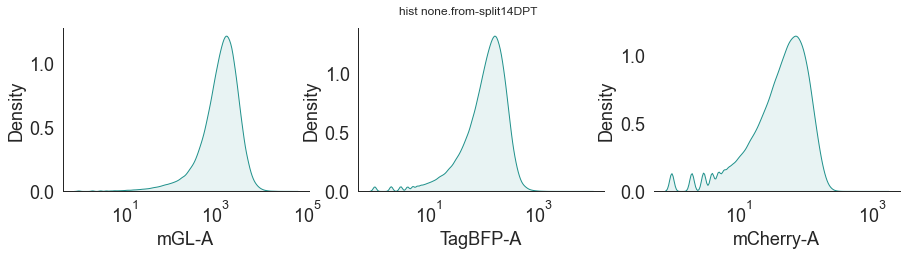

10000


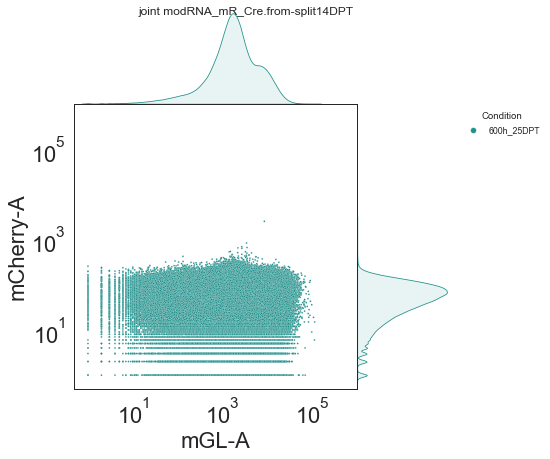

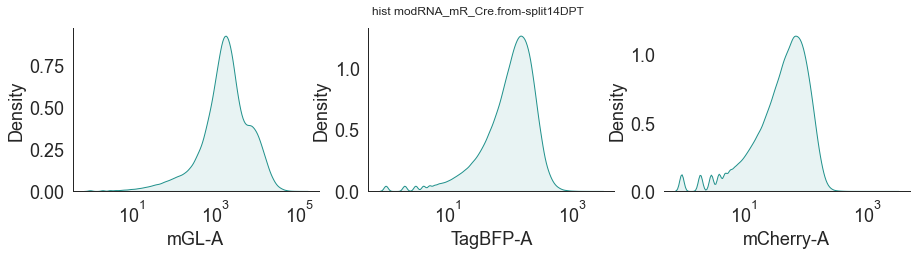

In [13]:
palette = 'viridis'
hue_order = None
for condition in pd.unique(data['condition']):
    hue = 'hour_text'
    plottitle = 'joint ' + condition
    data_now = data[data['condition']==condition]
    g = custom_density_plot(xcat='mGL-A',ycat='mCherry-A', hue=hue, data=data_now,
                            points = 10000, plottitle=plottitle, hue_order=hue_order,
                            palette=palette, alpha=.1, type = ['scatter'],sample=False)
    g.savefig(figure_folder+ plottitle + '.png',dpi=300,bbox_inches='tight')

    plottitle = 'hist ' + condition
    h = custom_hist_plot( data_now, ['mGL-A','TagBFP-A','mCherry-A'], hue=hue, palette=palette, hueorder=hue_order, title=plottitle, 
                         alpha=0.1, fontsize=18, 
                         legendtitle='Condition',  axis_lines={'top': False, 'bottom': True, 'left': False, 'right': False},legend=False)
    h = h.get_figure()
    h.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')


# Summary Stats Calculations

## Overall stats

In [8]:
df = data
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'condition','hour','hour_text', 'bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_overall = calc_stats(df,by,x,stat) #calculate statistics 

s_overall.to_excel('FigS11_Cre-timecourse.xlsx',index=False)

#display(pd.unique(s_overall_means['hour']))
#display(s_overall_means)

In [ ]:
display(s_overall[ s_overall['hour_text']=='600h_25DPT'])

,reporter,condition,hour,hour_text,bioreplicate,mGL-A_gmean,mGL-A_median,mGL-A_std,mGL-A_mean,TagBFP-A_gmean,TagBFP-A_median,TagBFP-A_std,TagBFP-A_mean,mCherry-A_gmean,mCherry-A_median,mCherry-A_std,mCherry-A_mean,Fraction,Count
42,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre.from-split14DPT,600,600h_25DPT,bio1,1309.929599,1484.0,4188.069009,3008.178057,86.333750,106.0,91.779367,122.319134,39.454638,49.0,42.422061,57.264938,0.291475,97351
43,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre.from-split14DPT,600,600h_25DPT,bio2,1797.524092,1903.0,4790.445307,3588.804174,95.444458,116.0,100.247389,134.289627,40.308433,50.0,45.928316,59.177738,0.372435,124391
44,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre.from-split14DPT,600,600h_25DPT,bio3,1721.909696,1805.0,4936.970330,3522.912420,97.192321,118.0,97.981280,135.400554,39.741144,49.0,43.244959,57.946816,0.336090,112252
93,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,none.from-split14DPT,600,600h_25DPT,bio1,904.355819,1063.0,1085.388565,1299.620937,101.798842,123.0,100.749891,140.045445,39.223652,49.0,42.451307,57.123642,0.345622,154737
94,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,none.from-split14DPT,600,600h_25DPT,bio2,1460.897349,1729.0,1554.842073,2032.704273,102.803373,124.0,103.873555,141.949868,39.833971,49.0,42.991762,57.960919,0.359376,160895
95,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,none.from-split14DPT,600,600h_25DPT,bio3,1240.127123,1471.0,1412.602814,1760.578910,101.073609,123.0,103.070639,140.836523,39.455779,49.0,43.170863,57.619494,0.295002,132074


## Fold change of overal data from mGL 

In [9]:
s_repts = s_overall
bios = pd.unique(s_repts['bioreplicate'] )
repts = pd.unique(s_repts['reporter'] )

map = {'test':'test'}

for biorep in bios:
    for h_text in pd.unique(s_overall['hour_text']):
        mGL_noCre_ZF37 =  s_repts[ s_repts['condition']=='none']
        mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['hour_text']==h_text]
        mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['bioreplicate']==biorep]
        if h_text == '600h_25DPT':
            mGL_noCre_ZF37 = map[biorep+'240h']
        else:
            mGL_noCre_ZF37= mGL_noCre_ZF37['mGL-A_gmean'].iloc[0]
        map[biorep + h_text] = mGL_noCre_ZF37
#display(map)

s_overall['map'] = s_overall['bioreplicate'] + s_overall['hour_text']
s_overall['noCre_mGL-A_gmean'] = s_overall['map'].map(map)
s_overall['Fold Change'] = s_overall['mGL-A_gmean'] / s_overall['noCre_mGL-A_gmean']



## Normalize tagBFP

In [10]:
# normalize all to the +DOX, -GIB conditon with the 203bp spacer
Cre_cond = pd.array(['modRNA_mR_Cre', 'none'] )
s_repts = s_overall[ s_overall['condition'].isin(Cre_cond)]
bios = pd.unique(s_repts['bioreplicate'] )
repts = pd.unique(s_repts['reporter'] )

map = {'test':'test'}

for biorep in bios:
    for h_text in pd.unique(s_overall['hour_text']):
        for cond in pd.unique(s_repts['condition']):
            mGL_noCre_ZF37 =  s_repts[ s_repts['condition']==cond]
            mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['hour_text']==h_text]
            mGL_noCre_ZF37 =  mGL_noCre_ZF37[ mGL_noCre_ZF37['bioreplicate']==biorep]
            if h_text == '600h_25DPT':
                mGL_noCre_ZF37 = map[biorep+'240h'+cond]
            else:
                mGL_noCre_ZF37= mGL_noCre_ZF37['TagBFP-A_gmean'].iloc[0]
            map[biorep + h_text + cond] = mGL_noCre_ZF37
#display(map)

s_overall['map'] = s_overall['bioreplicate'] + s_overall['hour_text'] + s_overall['condition']
s_overall['TagBFP'] = s_overall['map'].map(map)
s_overall['mGL_TagBFP_norm'] = s_overall['mGL-A_gmean'] / s_overall['TagBFP']



## Means for Ungated

In [11]:
df = s_overall
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'condition','hour', 'hour_text'] #how to filter results, columns 
x = ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean', 'Fold Change', 'mGL_TagBFP_norm'] #which parameter to calculate results on
stat = [np.mean, np.std] #statistics to calculate
s_overall_means = calc_stats(df,by,x,stat) #calculate statistics 
display(s_overall_means)

,reporter,condition,hour,hour_text,mGL-A_gmean_mean,mGL-A_gmean_std,TagBFP-A_gmean_mean,TagBFP-A_gmean_std,mCherry-A_gmean_mean,mCherry-A_gmean_std,Fold Change_mean,Fold Change_std,mGL_TagBFP_norm_mean,mGL_TagBFP_norm_std,Fraction,Count
0,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,0,0h,1396.079996,121.344853,223.250300,2.505501,42.208683,1.612131,1.042876,0.091583,6.258002,0.615745,1.0,3
1,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,15,15h,1562.739511,50.463003,241.524779,25.980962,151.326653,27.402283,1.163250,0.178788,6.531213,0.860019,1.0,3
2,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,24,24h,2095.919948,158.235319,252.234018,6.848823,381.772094,39.614820,1.238162,0.038200,8.303654,0.456020,1.0,3
3,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,36,36h,2439.461369,47.034476,248.484298,9.157688,389.584369,32.276883,1.471185,0.068096,9.828479,0.478177,1.0,3
4,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,48,48h,3022.298091,293.146277,275.981544,5.800410,305.883149,44.413031,1.918689,0.226863,10.939886,0.839220,1.0,3
5,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,60,60h,2767.267822,179.970571,240.185954,8.763954,233.062689,29.655015,2.148501,0.221215,11.513612,0.327383,1.0,3
6,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,72,72h,2629.425293,135.741371,233.166288,2.089919,170.982983,25.108866,2.267873,0.108946,11.275132,0.516916,1.0,3
7,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,96,96h,1970.584099,308.555884,164.155626,8.412479,98.341269,16.986568,2.592632,0.436999,11.973088,1.475977,1.0,3
8,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,120,120h,1518.438004,411.801005,139.893604,10.021494,107.776090,0.965652,1.913869,0.195651,10.775146,2.339914,1.0,3
9,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_mR_Cre,145,145h,2926.380252,380.220991,149.549905,4.856284,58.185345,2.788919,3.135610,0.297243,19.593403,2.786977,1.0,3


## Gated for the ones with modRNA

In [12]:
data_noCre = data[ data['condition']=='none']
data_Cre = data_mChgated[ data_mChgated['condition']!='none']
df = pd.concat([data_noCre, data_Cre])
by = ['reporter', 'condition','hour', 'bioreplicate','well'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A', 'mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
s_gatedCre = calc_stats(df,by,x,stat) #calculate statistics 

df = s_gatedCre
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['reporter', 'condition','hour'] #how to filter results, columns 
x = ['mGL-A_gmean', 'TagBFP-A_gmean', 'mCherry-A_gmean'] #which parameter to calculate results on
stat = [np.mean, np.std] #statistics to calculate
s_gatedCre_means = calc_stats(df,by,x,stat) #calculate statistics 

#display(s_gatedCre_means)

# Summary Plots - Scatter Plots Timecourse Figure

## scatterplot mGL with means

In [20]:
display(pd.unique(data['condition']))

array(['modRNA_mR_Cre', 'none', 'modRNA_mR_Cre.from-split10DPT',
       'none.from-split10DPT', 'modRNA_mR_Cre.from-split7DPT',
       'none.from-split7DPT', 'modRNA_mR_Cre.from-split3DPT',
       'none.from-split3DPT', 'none.from-split14DPT',
       'modRNA_mR_Cre.from-split14DPT'], dtype=object)

c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


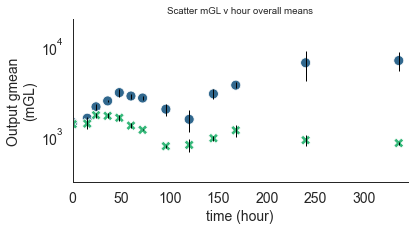

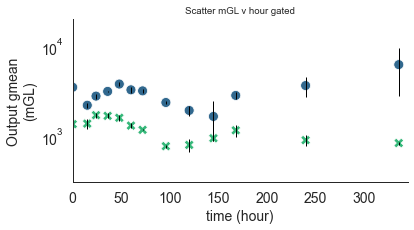

In [21]:
# plot the original scatterplot
#Plot Scatterplot 
data_now = s_overall_means[ s_overall_means['condition'].isin(['modRNA_mR_Cre', 'none'])]
style = 'condition'; hue='condition'; hue_order = pd.unique(data_now['condition'])
palette = 'viridis'
x = 'hour'
y = 'mGL-A_gmean_mean'
xlabel = 'time (hour)'
ylabel = 'Output gmean\n(mGL)'
xsize = 6
ysize = 3
xlim = [0,345]
ylim = [3e2, 2e4]
fontsize = 14
xscale = 'linear'
yscale = 'log'

x_std = 'mGL-A_gmean_std'
y_std = 'mGL-A_gmean_std'
plottitle = 'Scatter mGL v hour overall means'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale, yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False,std_y=y_std)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

data_now = s_gatedCre_means[ s_gatedCre_means['condition'].isin(['modRNA_mR_Cre', 'none'])]
plottitle = 'Scatter mGL v hour gated'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale,yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False,  std_y=y_std)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## scatterplot mGL no MEANS

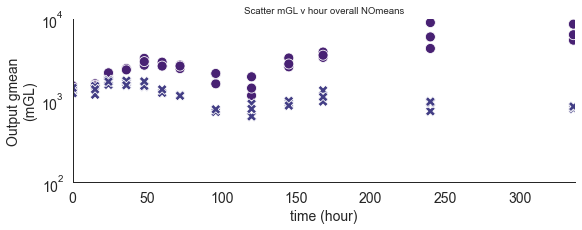

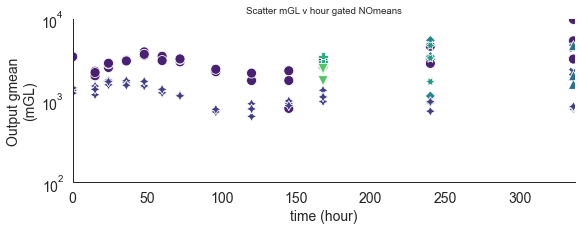

In [22]:
# plot the original scatterplot
#Plot Scatterplot 
data_now = s_overall[ s_overall['condition'].isin(['modRNA_mR_Cre', 'none'])]
style = 'condition'; hue='condition'; hue_order = pd.unique(data['condition'])
palette = 'viridis'
x = 'hour'
y = 'mGL-A_gmean'
xlabel = 'time (hour)'
ylabel = 'Output gmean\n(mGL)'
xsize = 9
ysize = 3
xlim = [0,337]
ylim = [1e2, 1e4]
fontsize = 14
xscale = 'linear'
yscale = 'log'

x_std = 'hour_std'
y_std = 'mGL-A_gmean_std'
plottitle = 'Scatter mGL v hour overall NOmeans'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale, yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

data_now = s_gatedCre
plottitle = 'Scatter mGL v hour gated NOmeans'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale,yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Fold Change scatterplot, no means and means

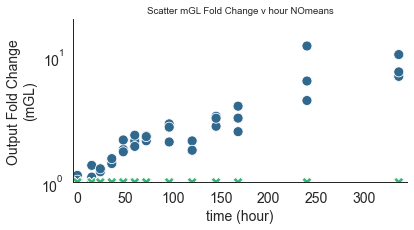

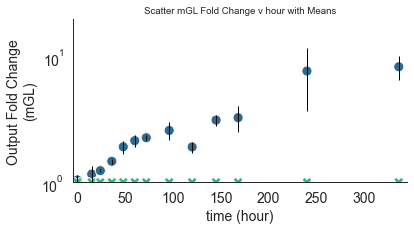

In [23]:
# plot the original scatterplot
#Plot Scatterplot 

Cre_cond_noSplit = pd.array(['modRNA_mR_Cre', 'none'] )


data_now = s_overall[s_overall['condition'].isin(Cre_cond_noSplit)]
style = 'condition'; hue='condition'; hue_order = pd.unique(data_now['condition'])
palette = 'viridis'
x = 'hour'
y = 'Fold Change'
xlabel = 'time (hour)'
ylabel = 'Output Fold Change\n(mGL)'
xsize = 6
ysize = 3
xlim = [-5,345]
ylim = [1, 20]
fontsize = 14
xscale = 'linear'
yscale = 'log'


plottitle = 'Scatter mGL Fold Change v hour NOmeans'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale, yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


data_now = s_overall_means[s_overall_means['condition'].isin(Cre_cond_noSplit)]
x = 'hour'
x_std = 'hour_std'
y = 'Fold Change_mean'
std_y = 'Fold Change_std'
plottitle = 'Scatter mGL Fold Change v hour with Means'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale, yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, std_y = std_y,
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## mGL normalized by TagBFP

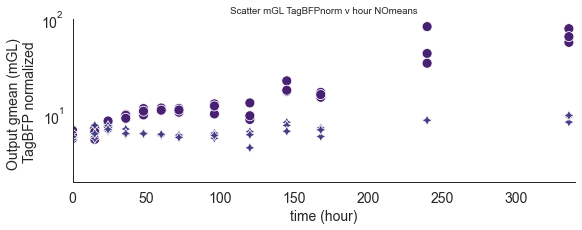

In [24]:
# plot the original scatterplot
#Plot Scatterplot 
data_now = s_overall
style = 'condition'; hue='condition'; hue_order = pd.unique(data['condition'])
palette = 'viridis'
x = 'hour'
y = 'mGL_TagBFP_norm'
xlabel = 'time (hour)'
ylabel = 'Output gmean (mGL) \nTagBFP normalized'
xsize = 9
ysize = 3
xlim = [0,340]
ylim = [2, 100]
fontsize = 14
xscale = 'linear'
yscale = 'log'


plottitle = 'Scatter mGL TagBFPnorm v hour NOmeans'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale, yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## scatterplot mRuby

c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
c:\Users\ChemeGrad2020\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


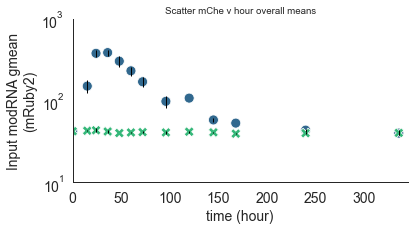

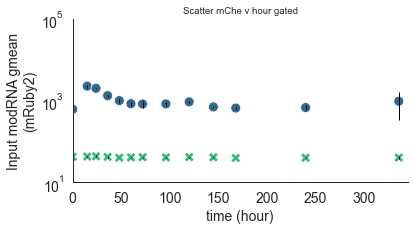

In [25]:
# plot the original scatterplot
#Plot Scatterplot 
data_now = s_overall_means
data_now = s_overall_means[ s_overall_means['condition'].isin(['modRNA_mR_Cre', 'none'])]
style = 'condition'; hue='condition'; hue_order = pd.unique(data_now['condition'])
palette = 'viridis'
x = 'hour'
y = 'mCherry-A_gmean_mean'
xlabel = 'time (hour)'
ylabel = 'Input modRNA gmean\n(mRuby2)'
xsize = 6
ysize = 3
xlim = [0,345]
ylim = [1e1, 1e3]
fontsize = 14
xscale = 'linear'

y_std = 'mCherry-A_gmean_std'
plottitle = 'Scatter mChe v hour overall means'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False, std_y=y_std)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

ylim = [1e1, 1e5]
data_now = s_gatedCre_means[ s_gatedCre_means['condition'].isin(['modRNA_mR_Cre', 'none'])]
plottitle = 'Scatter mChe v hour gated'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False, std_y=y_std)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Scatter plot mRuby no means

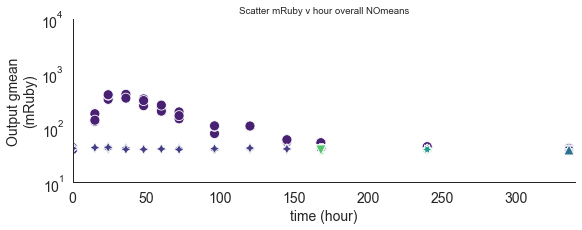

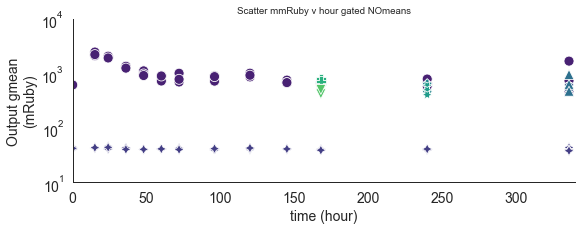

In [26]:
# plot the original scatterplot
#Plot Scatterplot 
data_now = s_overall
style = 'condition'; hue='condition'; hue_order = pd.unique(data['condition'])
palette = 'viridis'
x = 'hour'
y = 'mCherry-A_gmean'
xlabel = 'time (hour)'
ylabel = 'Output gmean\n(mRuby)'
xsize = 9
ysize = 3
xlim = [0,340]
ylim = [1e1, 1e4]
fontsize = 14

xscale = 'linear'
yscale = 'log'

x_std = 'hour_std'
y_std = 'mGL-A_gmean_std'
plottitle = 'Scatter mRuby v hour overall NOmeans'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale, yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

data_now = s_gatedCre
plottitle = 'Scatter mmRuby v hour gated NOmeans'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale,yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Scatterplot TagBFP no means

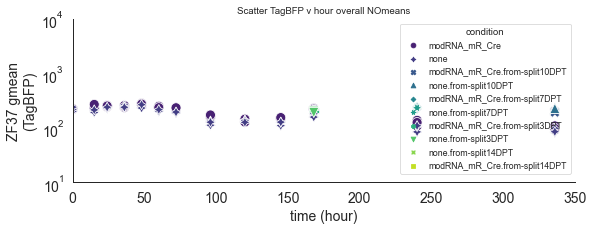

In [27]:
# plot the original scatterplot
#Plot Scatterplot 
data_now = s_overall
style = 'condition'; hue='condition'; hue_order = pd.unique(data['condition'])
palette = 'viridis'
x = 'hour'
y = 'TagBFP-A_gmean'
xlabel = 'time (hour)'
ylabel = 'ZF37 gmean\n(TagBFP)'
xsize = 9
ysize = 3
xlim = [0,350]
ylim = [1e1, 1e4]
fontsize = 14

xscale = 'linear'
yscale = 'log'

plottitle = 'Scatter TagBFP v hour overall NOmeans'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale, yscale=yscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=True)
g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


## Scatter plot TagBFP means

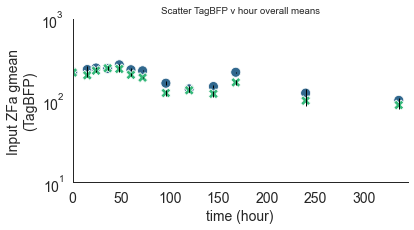

In [28]:
# plot the original scatterplot
#Plot Scatterplot 
data_now = s_overall_means
data_now = s_overall_means[ s_overall_means['condition'].isin(['modRNA_mR_Cre', 'none'])]
style = 'condition'; hue='condition'; hue_order = pd.unique(data_now['condition'])
palette = 'viridis'
x = 'hour'
y = 'TagBFP-A_gmean_mean'
xlabel = 'time (hour)'
ylabel = 'Input ZFa gmean\n(TagBFP)'
xsize = 6
ysize = 3
xlim = [0,345]
ylim = [1e1, 1e3]
fontsize = 14
xscale = 'linear'

y_std = 'TagBFP-A_gmean_std'
plottitle = 'Scatter TagBFP v hour overall means'
plt.figure(figsize=(xsize,ysize))
g = scatter_plot(data=data_now, x=x, y=y, hue=hue, palette = palette, xscale=xscale,
                 plottitle=plottitle, style=style, hue_order=hue_order, 
                 ylim=ylim, xlim=xlim, s= 100, xlabel=xlabel, ylabel=ylabel, 
                 fontsize=fontsize, labelsize=fontsize, legend=False, std_y=y_std)

g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


# Summary Plots - Scatter Plots Passaging Figure 3 Supplement

## Select data

In [12]:
# Get data 
palette = {
       'none': '#C3DB9A',                                                
      'modRNA_mR_Cre': '#69B645', 
      'modRNA_mR_Cre.from-split10DPT': '#69B645',
       'none.from-split10DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split7DPT': '#69B645',
       'none.from-split7DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split3DPT': '#69B645',
       'none.from-split3DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split14DPT': '#69B645',
       'none.from-split14DPT': '#C3DB9A'}
Cre_cond = { 'modRNA_mR_Cre.from-split10DPT': '#69B645',
       'none.from-split10DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split7DPT': '#69B645',
       'none.from-split7DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split3DPT': '#69B645',
       'none.from-split3DPT': '#C3DB9A', 
       'modRNA_mR_Cre.from-split14DPT': '#69B645',
       'none.from-split14DPT': '#C3DB9A'}
Cre_cond_3DPT = {
       'none': '#C3DB9A',                                                
      'modRNA_mR_Cre': '#69B645', }


data_neg = data_neg

data_now = data[ data['condition'].isin(Cre_cond)]
data_now_3DPT = data[ (data['condition'].isin(Cre_cond_3DPT)) & (data['hour_text']=='72h')]
data_splitting = pd.concat([data_now, data_now_3DPT])

## Rename conditions to same as lentiline docs

In [13]:
map_Cre = {
       'none': 'noCre',                                            
      'modRNA_mR_Cre': 'modRNA_100ngxCre',    
      'modRNA_mR_Cre.from-split10DPT': 'modRNA_100ngxCre', 
       'none.from-split10DPT': 'noCre', 
       'modRNA_mR_Cre.from-split7DPT': 'modRNA_100ngxCre', 
       'none.from-split7DPT': 'noCre',  
       'modRNA_mR_Cre.from-split3DPT': 'modRNA_100ngxCre', 
       'none.from-split3DPT': 'noCre',  
       'modRNA_mR_Cre.from-split14DPT': 'modRNA_100ngxCre', 
       'none.from-split14DPT': 'noCre', }

data_splitting['Cre'] = data_splitting['condition'].map(map_Cre)

map_DPT_short = {
       'none': '3',                                            
      'modRNA_mR_Cre': '3',    
      'modRNA_mR_Cre.from-split10DPT': '14', 
       'none.from-split10DPT': '14', 
       'modRNA_mR_Cre.from-split7DPT': '10', 
       'none.from-split7DPT': '10',  
       'modRNA_mR_Cre.from-split3DPT': '7', 
       'none.from-split3DPT': '7',  
       'modRNA_mR_Cre.from-split14DPT': '25', 
       'none.from-split14DPT': '25' }
data_splitting['DPT_short'] =data_splitting['condition'].map(map_DPT_short)

data_splitting['reporter_ZF'] = data_splitting['reporter']


In [15]:
display(data_splitting)

,reporter,hour,hour_text,condition,bioreplicate,passaged,well,population,FSC-A,FSC-H,...,Janelia Fluor 549-A,Janelia Fluor 549-H,Janelia Fluor 549-W,mCherry-A,mCherry-H,mCherry-W,Time,Cre,DPT_short,reporter_ZF
866392,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,336,336h,modRNA_mR_Cre.from-split10DPT,bio2,False,F10,Single Cells,230703,153252,...,122.0,107.0,5,54,56,0,0.000000,modRNA_100ngxCre,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
866396,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,336,336h,modRNA_mR_Cre.from-split10DPT,bio2,False,F10,Single Cells,360802,227641,...,183.0,138.0,21,26,71,0,0.002017,modRNA_100ngxCre,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
866402,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,336,336h,modRNA_mR_Cre.from-split10DPT,bio2,False,F10,Single Cells,517615,266790,...,261.0,96.0,0,30,63,0,0.008068,modRNA_100ngxCre,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
866404,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,336,336h,modRNA_mR_Cre.from-split10DPT,bio2,False,F10,Single Cells,303785,183271,...,292.0,168.0,30,69,61,0,0.011093,modRNA_100ngxCre,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
866405,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,336,336h,modRNA_mR_Cre.from-split10DPT,bio2,False,F10,Single Cells,386538,202996,...,113.0,124.0,15,7,76,0,0.012102,modRNA_100ngxCre,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372695,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,72,72h,modRNA_mR_Cre,bio3,True,G6,Single Cells,585782,265859,...,511.0,324.0,55,20,64,0,19.964700,modRNA_100ngxCre,3,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
1372696,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,72,72h,modRNA_mR_Cre,bio3,True,G6,Single Cells,318981,218177,...,5221.0,3147.0,119,290,185,32,19.966700,modRNA_100ngxCre,3,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
1372697,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,72,72h,modRNA_mR_Cre,bio3,True,G6,Single Cells,475471,300706,...,6495.0,4967.0,126,478,350,47,19.967700,modRNA_100ngxCre,3,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
1372698,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,72,72h,modRNA_mR_Cre,bio3,True,G6,Single Cells,323046,205860,...,634.0,207.0,104,54,64,0,19.967700,modRNA_100ngxCre,3,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP


## Calculate summary stats

In [14]:
#Decide how to group. The last parameter will be the condition that it is group by by last ('well' or 'bioreplicate')
by = ['DPT_short', 'reporter_ZF', 'Cre', 'bioreplicate'] #how to filter results, columns 
x = ['mGL-A', 'TagBFP-A','mCherry-A'] #which parameter to calculate results on
stat = [sp.stats.gmean, np.median, np.std, np.mean] #statistics to calculate
#Gated mGL+
df = data_splitting[ data_splitting['mGL-A']>mGL_gate] #choose dataframe
#display(df)
s_splitting_gated = calc_stats(df,by,x,stat) #calculate statistics 
s_splitting_gated.to_excel('FigS14_s_splitting_gated.xlsx',index=False)

#for silencing calculation 

#Label for the mGL Gate 
data_splitting['mGL+'] = np.where( data_splitting['mGL-A']> mGL_gate, '+', '-')
df = data_splitting
by = ['DPT_short', 'reporter_ZF', 'Cre', 'bioreplicate','mGL+']
s_splitting_silencing = calc_stats(df,by,x,stat) #calculate statistics 
s_splitting_silencing = s_splitting_silencing[ s_splitting_silencing['mGL+']== '+']
s_splitting_silencing.to_excel('FigS14_lenti_passage_silence.xlsx',index=False)

In [17]:
display(s_splitting_silencing)

,DPT_short,reporter_ZF,Cre,bioreplicate,mGL+,mGL-A_gmean,mGL-A_median,mGL-A_std,mGL-A_mean,TagBFP-A_gmean,TagBFP-A_median,TagBFP-A_std,TagBFP-A_mean,mCherry-A_gmean,mCherry-A_median,mCherry-A_std,mCherry-A_mean,Fraction,Count
0,10,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_100ngxCre,bio1,+,3346.736341,3849.0,5276.484412,5450.581301,233.371710,261.0,183.775322,291.808386,40.615126,50.0,44.784251,58.841075,0.954388,20129
2,10,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_100ngxCre,bio2,+,3707.764004,4508.0,5598.874538,5971.652078,250.878705,277.0,214.325332,316.389764,40.600620,49.0,101.352765,62.385317,0.959231,18211
4,10,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_100ngxCre,bio3,+,3601.958512,3986.5,5437.325770,5761.484830,246.043720,272.0,191.305792,304.514620,40.701052,51.0,42.505907,58.630230,0.960461,16348
6,10,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,noCre,bio1,+,1270.900982,1314.0,1152.390164,1588.254570,238.156350,263.0,183.986254,292.628764,40.446828,50.0,43.279557,58.520144,0.942985,16903
8,10,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,noCre,bio2,+,1342.731414,1389.0,1299.678315,1677.350810,243.116756,269.0,177.216741,296.587794,40.282930,50.0,50.846301,58.435904,0.949234,21858
10,10,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,noCre,bio3,+,1529.520714,1617.0,1398.248789,1936.388145,244.303265,268.0,180.569372,297.110182,40.267452,49.0,43.079458,58.061251,0.951742,19722
12,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_100ngxCre,bio1,+,2332.696759,2265.0,4260.523165,3963.795759,204.402878,229.0,177.854104,262.132434,39.177334,48.0,42.799306,56.541976,0.926587,10375
14,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_100ngxCre,bio2,+,2707.048024,2753.0,4794.442871,4508.375401,213.679804,240.0,196.764932,277.872965,39.510470,49.0,59.503828,58.302080,0.937500,8415
16,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,modRNA_100ngxCre,bio3,+,2507.703209,2353.0,4605.640987,4240.677522,203.215144,229.0,169.971708,258.465155,38.997409,47.0,40.868870,56.065509,0.938853,7892
18,14,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,noCre,bio1,+,1361.676597,1417.0,1270.914715,1721.154098,243.832996,269.0,196.971983,302.541348,39.258801,49.0,42.366513,56.915574,0.936700,10980


## Mean plots 

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7_noCre v.s. 7_modRNA_100ngxCre: t-test independent samples, P_val=4.863e-04 stat=-1.038e+01
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=1.295e-05 stat=-2.603e+01
10_noCre v.s. 10_modRNA_100ngxCre: t-test independent samples, P_val=7.999e-05 stat=-1.645e+01
14_noCre v.s. 14_modRNA_100ngxCre: t-test independent samples, P_val=8.416e-04 stat=-9.006e+00
25_noCre v.s. 25_modRNA_100ngxCre: t-test independent samples, P_val=2.363e-02 stat=-3.558e+00


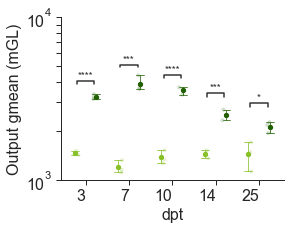

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7_noCre v.s. 7_modRNA_100ngxCre: t-test independent samples, P_val=2.711e-01 stat=-1.276e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=6.928e-06 stat=-3.045e+01
10_noCre v.s. 10_modRNA_100ngxCre: t-test independent samples, P_val=7.909e-01 stat=-2.834e-01
14_noCre v.s. 14_modRNA_100ngxCre: t-test independent samples, P_val=1.067e-03 stat=8.466e+00
25_noCre v.s. 25_modRNA_100ngxCre: t-test independent samples, P_val=4.713e-02 stat=2.834e+00


<Figure size 432x288 with 0 Axes>

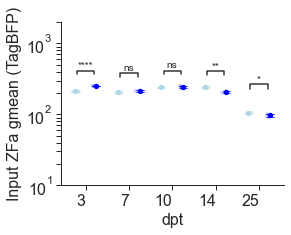

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

7_noCre v.s. 7_modRNA_100ngxCre: t-test independent samples, P_val=2.640e-03 stat=-6.660e+00
3_noCre v.s. 3_modRNA_100ngxCre: t-test independent samples, P_val=9.500e-04 stat=-8.726e+00
10_noCre v.s. 10_modRNA_100ngxCre: t-test independent samples, P_val=9.392e-03 stat=-4.688e+00
14_noCre v.s. 14_modRNA_100ngxCre: t-test independent samples, P_val=2.406e-01 stat=1.377e+00
25_noCre v.s. 25_modRNA_100ngxCre: t-test independent samples, P_val=4.174e-01 stat=-9.034e-01


<Figure size 432x288 with 0 Axes>

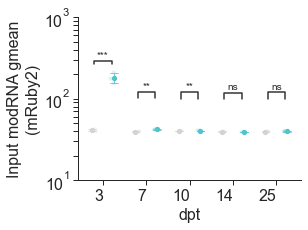

<Figure size 432x288 with 0 Axes>

In [20]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data_splitting['reporter_ZF'])
hue = 'Cre' 
hue_order = pd.array(['noCre','modRNA_100ngxCre'])
palette_mGL = {'noCre':"#87C027",       #'#C3DB9A', 
               'DNA_0.1xCre':'red', 
               'modRNA_100ngxCre': "#206002"}   # '#69B645'}
palette_mCherry = {'noCre': 'lightblue', 
               'DNA_0.1xCre':'orange', 
               'modRNA_100ngxCre':'blue'}
palette_tagBFP_Cre = { 'noCre': 'lightgray', 
               'DNA_0.1xCre':'gray', 
               'modRNA_100ngxCre':'#4EC4CC'}

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_mCherry,
        'mCherry-A_gmean': palette_tagBFP_Cre,}

x = 'DPT_short'
xlabel = 'dpt'
order = pd.array(['3', '7','10', '14', '25']) 

#List of stats to plot 
stats_plot = pd.array( ['mGL-A_gmean','TagBFP-A_gmean','mCherry-A_gmean'])
#set plotting parameters 
yscale= 'log'
ylims = { 'mGL-A_gmean': [1e3, 1e4],
        'TagBFP-A_gmean':  [1e1, 2e3], 
        'mCherry-A_gmean': [1e1, 1e3]}

ylabels = { 'mGL-A_gmean': 'Output gmean (mGL)',
        'TagBFP-A_gmean':  'Input ZFa gmean (TagBFP)', 
        'mCherry-A_gmean': 'Input modRNA gmean\n(mRuby2)'}


#Set p-value significance comparisons 
pairs = [ [('3','noCre'), ('3','modRNA_100ngxCre')],
         [('7','noCre'), ('7','modRNA_100ngxCre')],
         [('10','noCre'), ('10','modRNA_100ngxCre')],
         [('14','noCre'), ('14','modRNA_100ngxCre')],
         [('25','noCre'), ('25','modRNA_100ngxCre')],
]

xsize =4  ; ysize = 3
fontsize = 16

for rept in rept_ZFs:
       for stat in stats_plot:
              y = stat # set the stat to plot
              palette = palettes[stat]
              yscale = 'log'
              ylabel = ylabels[stat]
              ylim = ylims[stat]
              data_now = s_splitting_gated[s_splitting_gated['reporter_ZF']==rept]
              plottitle = stat + ' Splitting GatedmGL '
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle='', 
                            xlabel='dpt')
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')

## Fraction plot

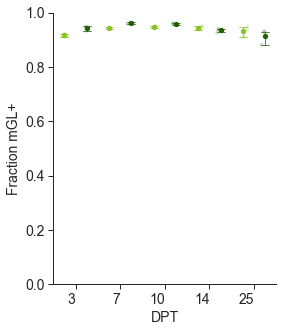

<Figure size 432x288 with 0 Axes>

In [19]:
#Plot summary plot for each reporter and it's correspond mRNA color
rept_ZFs= pd.unique( data_splitting['reporter_ZF'])
hue = 'Cre' 
hue_order = pd.array(['noCre','modRNA_100ngxCre'])

#List of stats to plot 
stats_plot = pd.array( ['Fraction'])
#set plotting parameters 
yscale= 'linear'
ylims = { 'Fraction': [0,1]}
ylabels = { 'Fraction': 'Fraction mGL+'}


#Set p-value significance comparisons 
pairs = [ ]

palettes = { 'mGL-A_gmean': palette_mGL,
        'TagBFP-A_gmean':  palette_tagBFP_Cre, 
        'mCherry-A_gmean': palette_mCherry, 
        'Fraction': palette_mGL}

xsize =4  ; ysize = 5
fontsize = 14

for rept in rept_ZFs:
       for stat in stats_plot:
              y = stat # set the stat to plot
              palette = palettes[stat]
              ylabel = ylabels[stat]
              ylim = ylims[stat]
              data_now = s_splitting_silencing[s_splitting_silencing['reporter_ZF']==rept]
              data_now = data_now[ data_now['mGL+']=='+']
              plottitle = 'Fraction mGLpos Splitting'
              g = plt.figure(figsize=(xsize,ysize))
              g = summary_plot( x=x, y=y, hue=hue, data=data_now, pairs=pairs, yscale=yscale, 
                            ylim=ylim, fontsize=fontsize, ylabel=ylabel, legend=False,
                            x_rot=0, palette = palette, order=order, hue_order=hue_order, plottitle='', 
                            xlabel=xlabel)
              g.figure.savefig(figure_folder + plottitle + '.svg',dpi=300,bbox_inches='tight')


# Which reporter display

In [36]:
display(data['reporter'])

2          293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
4          293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
6          293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
7          293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
11         293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
                           ...                  
5490505    293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
5490510    293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
5490512    293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
5490517    293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
5490520    293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP
Name: reporter, Length: 1403097, dtype: object

# Fraction mGL>6000

In [37]:
# Count the total number of cells in each 'cond' and 'DPT' group
by = ['reporter', 'DPT_short','Cre']
df = data_splitting #choose dataframe
total_counts = df.groupby(by).size()

# Count the number of cells with 'mGL-A' > 10000 in each 'cond' and 'DPT' group
counts_above_10000 = df[df['mGL-A'] >6000].groupby(by).size()

# Calculate the fraction
fraction = (counts_above_10000 / total_counts).fillna(0).reset_index(name='fraction')

display(fraction)

,reporter,DPT_short,Cre,fraction
0,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,10,modRNA_100ngxCre,0.362121
1,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,10,noCre,0.010199
2,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,14,modRNA_100ngxCre,0.232338
3,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,14,noCre,0.013374
4,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,25,modRNA_100ngxCre,0.164826
5,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,25,noCre,0.013777
6,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,3,modRNA_100ngxCre,0.253366
7,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,3,noCre,0.019739
8,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,7,modRNA_100ngxCre,0.424791
9,293T_203bp-mGL-WPRE_no-DIV_ZF37tagBFP,7,noCre,0.005102


# mGL+ Gating Joint Plot Example

5000


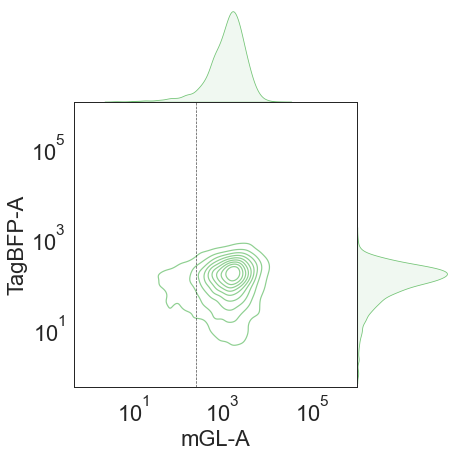

In [38]:
data_now = data_splitting[ (data_splitting['Cre']=='noCre') & (data_splitting['DPT_short']=='25')]

plottitle = ''
g = custom_density_plot(xcat='mGL-A',ycat='TagBFP-A', hue='Cre', data=data_now, points = 5000, hue_order =None, 
                        plottitle=plottitle, legend=False,
                        palette='Greens', alpha=0.1, type = ['contour'], vline=[mGL_gate])
plottitle = 'Gating Stategy 25DPT no modRNA'
g.savefig(figure_folder+ plottitle + '.svg',dpi=300,bbox_inches='tight')